# aperature photometry

In [69]:
import photutils

## science frame V

find counts in each star for V filter

start with V filter because better for stars

use the same points in B filter to keep consistent

<ipython-input-70-cf4c9ee2055a>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  img = plt.imshow(science_frame_V, origin='lower', cmap='gray', norm=LogNorm(), vmax=1300) # plot data


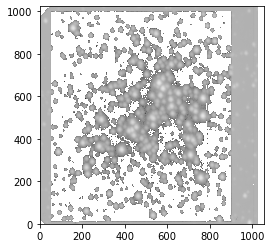

In [70]:
img = plt.imshow(science_frame_V, origin='lower', cmap='gray', norm=LogNorm(), vmax=1300) # plot data
plt.show()

In [72]:
# try getting started with photutils
imageV = science_frame_V[10:1000, 50: 900]

imageV -= np.median(imageV)  

print(1000-10, 9000-50)
print(len(science_frame_V))

990 8950
1024


In [73]:
from photutils.detection import DAOStarFinder
from astropy.stats import mad_std

bkg_sigma = mad_std(imageV)  
daofind = DAOStarFinder(fwhm=15.0, threshold=2.5 * bkg_sigma)  
sources = daofind(imageV)  
for col in sources.colnames:  
    sources[col].info.format = '%.8g'  # for consistent table output
print(sources)  

 id xcentroid ycentroid  sharpness  ... sky     peak        flux       mag    
--- --------- ---------- ---------- ... --- ------------ --------- -----------
  1 138.33385 -1.5968039 0.65793498 ...   0   0.27717946 1.9575239 -0.72926769
  2 269.42163  9.7662205 0.48862397 ...   0    6.6168548 25.637117   -3.522173
  3 199.57232  13.766392 0.47120856 ...   0  0.033722958 1.2633649 -0.25382201
  4 791.68204  11.548977 0.53885175 ...   0    43.890264 161.68669  -5.5216857
  5 62.426159  13.208141 0.48378667 ...   0    4.8365392 19.318567  -3.2149373
  6 157.04013  16.649463 0.71743222 ...   0    2.1796853 7.4905775  -2.1862883
  7 81.034736  17.168425 0.74971619 ...   0    3.1690996 8.9300844  -2.3771389
  8 95.910183  17.549046 0.48312079 ...   0    4.4132205 17.075862  -3.0809566
  9 256.88469  20.264316 0.60417077 ...   0    3.4560407 11.746806  -2.6747995
 10  846.6086  21.265348 0.61079786 ...   0    2.9562977 12.358364  -2.7299024
...       ...        ...        ... ... ...         

In [74]:
from photutils.aperture import aperture_photometry, CircularAperture
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=15.0)  
phot_table = aperture_photometry(imageV, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter   ycenter   aperture_sum
       pix       pix                 
--- --------- ---------- ------------
  1 138.33385 -1.5968039   -80.698821
  2 269.42163  9.7662205    960.61494
  3 199.57232  13.766392   -122.89959
  4 791.68204  11.548977    5631.0495
  5 62.426159  13.208141    626.80275
  6 157.04013  16.649463    65.033299
  7 81.034736  17.168425    600.99856
  8 95.910183  17.549046    638.74438
  9 256.88469  20.264316    615.49484
 10  846.6086  21.265348    95.272534
...       ...        ...          ...
530 767.99105  968.76942    1288.8181
531 716.41676  975.82162    1680.7853
532 23.201044  984.01915   -148.24158
533 127.83833  979.38023    107.98227
534 436.57856  978.19339   -176.98199
535 54.816164  982.09083    -64.47249
536 178.81996  982.19495    58.020042
537 544.79775  981.00649    277.96539
538 578.18383  983.93921     324.0858
539  479.2917  987.20245   -27.767365
Length = 539 rows


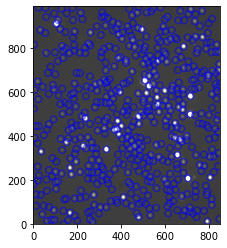

In [76]:
img = plt.imshow(science_frame_V[10:1000, 50: 900], origin='lower',
                 cmap='gray',vmin=-10, vmax=30) # plot data
apertures.plot(color='blue', lw=1.5, alpha=0.5)
plt.show()




In [77]:
ap_sum_V = np.array(phot_table['aperture_sum'])

## science frame B

find counts in each star for B filter

In [79]:
# try getting started with photutils
imageB = science_frame_B[10:1000, 50: 900]

imageB -= np.median(imageB)  

In [80]:
positions = np.transpose((sources['xcentroid'], sources['ycentroid']))  
apertures = CircularAperture(positions, r=15.0)  
phot_table = aperture_photometry(imageB, apertures)  
for col in phot_table.colnames:  
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)  

 id  xcenter   ycenter   aperture_sum
       pix       pix                 
--- --------- ---------- ------------
  1 138.33385 -1.5968039   -68.756351
  2 269.42163  9.7662205    420.81508
  3 199.57232  13.766392   -91.552556
  4 791.68204  11.548977    1395.3506
  5 62.426159  13.208141    263.70739
  6 157.04013  16.649463   -5.0902921
  7 81.034736  17.168425    231.73017
  8 95.910183  17.549046     247.8545
  9 256.88469  20.264316    265.92338
 10  846.6086  21.265348    7.5892175
...       ...        ...          ...
530 767.99105  968.76942    236.32976
531 716.41676  975.82162    378.46858
532 23.201044  984.01915   -143.66869
533 127.83833  979.38023    8.0359049
534 436.57856  978.19339   -123.49601
535 54.816164  982.09083   -62.945009
536 178.81996  982.19495   -25.039377
537 544.79775  981.00649    48.062263
538 578.18383  983.93921    92.681672
539  479.2917  987.20245   -53.168789
Length = 539 rows


<ipython-input-81-e668b54fa1c9>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(imageB, cmap='gray',norm=LogNorm(), vmax=100, origin='lower')


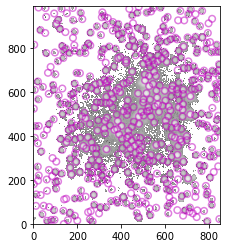

In [81]:
plt.imshow(imageB, cmap='gray',norm=LogNorm(), vmax=100, origin='lower')
apertures.plot(color='m', lw=1.5, alpha=0.5)
plt.show()

In [82]:
ap_sum_B = np.array(phot_table['aperture_sum'])

## science landolt V

find counts in each landolt star for V filter

MANUAL PHOTOMETRY

Star 111 1965, 
- V_mag 11.419 
- B-V: 1.710 
- (RA:19:37:42 dec:+00:26:50)

<ipython-input-83-023a2c87dffa>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  img = plt.imshow(landolt_frame_V, origin='lower', cmap='gray', norm=LogNorm(), vmax=1300) # plot data


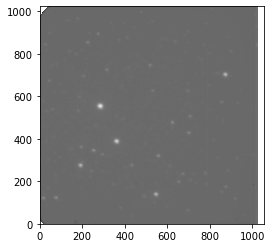

In [83]:
img = plt.imshow(landolt_frame_V, origin='lower', cmap='gray', norm=LogNorm(), vmax=1300) # plot data
plt.show()

<ipython-input-84-0e1a21eb2158>:13: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(data, norm=LogNorm(), vmax=1300, origin='lower')


(350.0, 450.0)

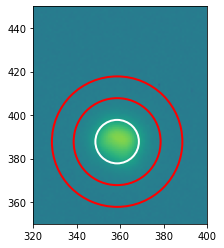

In [84]:
# notes manually
from astropy.visualization import simple_norm
from photutils.aperture import CircularAnnulus, CircularAperture


data = landolt_frame_V
positions = [ (358.544, 387.7875)] # landolt 111 1965
aperture = CircularAperture(positions, r=10) # keep radius consistent with the radius of cluster
annulus_aperture = CircularAnnulus(positions, r_in=20, r_out=30)


norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, norm=LogNorm(), vmax=1300, origin='lower')

ap_patches = aperture.plot(color='white', lw=2)
ann_patches = annulus_aperture.plot(color='red', lw=2)
plt.xlim(320, 400)
plt.ylim(350, 450)



In [85]:
from photutils.aperture import ApertureStats
aperstats = ApertureStats(data, annulus_aperture)
bkg_mean = aperstats.mean
print(bkg_mean)  

from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

aperture_area = aperture.area_overlap(data)
print(aperture_area)

total_bkg = bkg_mean * aperture_area
print(total_bkg) 

phot_bkgsub = phot_table['aperture_sum'] - total_bkg

phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub


for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

[6.53410308]
 id xcenter ycenter  aperture_sum
      pix     pix                
--- ------- -------- ------------
  1 358.544 387.7875    26357.757
[314.1592653589793]
[2052.74902232]
 id xcenter ycenter  aperture_sum total_bkg aperture_sum_bkgsub
      pix     pix                                              
--- ------- -------- ------------ --------- -------------------
  1 358.544 387.7875    26357.757  2052.749           24305.008


In [86]:
landolt_sum_V = np.array(phot_table['aperture_sum_bkgsub'])

## science landolt B

find counts in each landolt star for B filter

B-V = 1.710


<ipython-input-87-b960711b1fe9>:1: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  img = plt.imshow(landolt_frame_B, origin='lower', cmap='gray', norm=LogNorm(), vmax=1300) # plot data


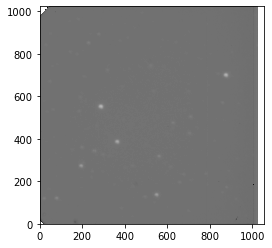

In [87]:
img = plt.imshow(landolt_frame_B, origin='lower', cmap='gray', norm=LogNorm(), vmax=1300) # plot data
plt.show()

<ipython-input-88-608aa963c31b>:13: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  plt.imshow(data, norm=LogNorm(), vmax=1300, origin='lower')


(350.0, 450.0)

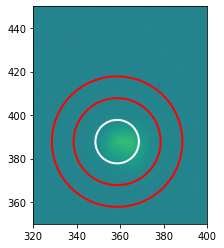

In [88]:
# notes manually
from astropy.visualization import simple_norm
from photutils.aperture import CircularAnnulus, CircularAperture


data = landolt_frame_B
positions = [ (358.544, 387.7875)] # landolt 111 1965
aperture = CircularAperture(positions, r=10) # keep radius consistent with the radius of cluster
annulus_aperture = CircularAnnulus(positions, r_in=20, r_out=30)


norm = simple_norm(data, 'sqrt', percent=99)
plt.imshow(data, norm=LogNorm(), vmax=1300, origin='lower')

ap_patches = aperture.plot(color='white', lw=2)
ann_patches = annulus_aperture.plot(color='red', lw=2)
plt.xlim(320, 400)
plt.ylim(350, 450)



In [89]:
from photutils.aperture import ApertureStats
aperstats = ApertureStats(data, annulus_aperture)
bkg_mean = aperstats.mean
print(bkg_mean)  

from photutils.aperture import aperture_photometry
phot_table = aperture_photometry(data, aperture)
for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

aperture_area = aperture.area_overlap(data)
print(aperture_area)

total_bkg = bkg_mean * aperture_area
print(total_bkg) 

phot_bkgsub = phot_table['aperture_sum'] - total_bkg

phot_table['total_bkg'] = total_bkg
phot_table['aperture_sum_bkgsub'] = phot_bkgsub


for col in phot_table.colnames:
    phot_table[col].info.format = '%.8g'  # for consistent table output
print(phot_table)

[3.93086351]
 id xcenter ycenter  aperture_sum
      pix     pix                
--- ------- -------- ------------
  1 358.544 387.7875    5026.2073
[314.1592653589793]
[1234.91719104]
 id xcenter ycenter  aperture_sum total_bkg aperture_sum_bkgsub
      pix     pix                                              
--- ------- -------- ------------ --------- -------------------
  1 358.544 387.7875    5026.2073 1234.9172           3791.2901


In [90]:
landolt_sum_B = np.array(phot_table['aperture_sum_bkgsub'])

# magnitude V

In [91]:
# m1 - m_ref = -2.5log_10 (F1/F_ref)

F_ref_V = landolt_sum_V
m_ref_V = 11.419

F1_V = ap_sum_V

M_V = m_ref_V-2.5*np.log10(F1_V/F_ref_V)


<ipython-input-91-e3194695f92b>:8: RuntimeWarning: invalid value encountered in log10
  M_V = m_ref_V-2.5*np.log10(F1_V/F_ref_V)


# magnitude B

In [92]:
F_ref_B = landolt_sum_B
m_ref_B = 1.710+m_ref_V
print(m_ref_B)

F1_B = ap_sum_B

M_B = m_ref_B-2.5*np.log10(F1_B/F_ref_B)


13.129000000000001


<ipython-input-92-b5e21a67fbea>:7: RuntimeWarning: invalid value encountered in log10
  M_B = m_ref_B-2.5*np.log10(F1_B/F_ref_B)


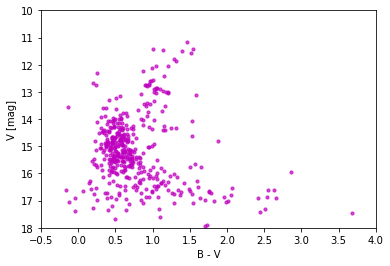

In [97]:
plt.scatter(M_B-M_V,M_V, color='m', s=10, alpha=0.7)
plt.ylabel('V [mag]')
plt.xlabel('B - V')
plt.ylim(18, 10)
plt.xlim(-.5, 4)
#outliers caused by backgroudn stars not in cluster
# or aperture too small and cuaght different starlight
#plt.savefig('./HR_diagram.png', dpi=400)